Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[218 218 218]
  [240 240 240]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[233 233 233]
  [247 247 247]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


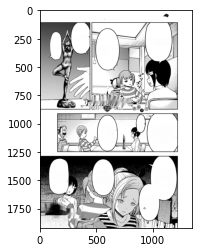

In [10]:
import keras_ocr #импортируем штуку для текста на картинках из великой библиотеки керас
import numpy as np #импортируем удобную библиотеку для работы с массивами
import math #импортируем математическую библиотеку для извлечения квадратного корня из выражения
import cv2 #импортируем одну из "фишек" знаменитой библиотеки OpenCV
import matplotlib.pyplot as plt #то, благодаря чему мы будем выводить на экран результат работы (в принципе, он нужен для проверки правильности работы)
from google.colab import drive #чтобы сохранить картинку
#
#
def remove_text_from_comics_page(img_path, iterator): #функция для удаления текста с картинки
    pipeline = keras_ocr.pipeline.Pipeline() #создаем модель
    img = keras_ocr.tools.read("/content/001_fc6F.jpg") #получаем изображение из заданного пути (считываем текст с картинки) (трехмерный массив)
    recognize = pipeline.recognize([img]) #выделяем массив с распознаванием текста, переведя изображение в лист
    mask = np.zeros(img.shape[:2], dtype="uint8") #создаем маску
    print(mask) #выведем маску
    for text_box in recognize[0]: #тут начинается алгоритм закраски с помощью cv2
        x0, y0 = text_box[1][0] #text_box - это массив с двумя числами-координатами углов бокса с текстом среди множества боксов с текстом из recognize
        x1, y1 = text_box[1][1] #получаем для х1 и у1
        x2, y2 = text_box[1][2] #получаем для х2 и у2
        x3, y3 = text_box[1][3] #получаем для х3 и у3
        cv2.line( #изображение для рисования линии с толщиной, равной радиусу. Необходима для закрашивания
            mask, #ранее созданная до цикла маска
            (int((x1 + x2) // 2), int((y1 + y2) // 2)), #целочисленная средняя точка между х1 и х2
            (int((x0 + x3) // 2), int((y0 + y3) // 2)), #целочисленная средняя точка между х0 и х3
            255, #рандомное целое число :////
            int(math.sqrt((x2 - x1)**2 + (y2 - y1)**2)) #целочисленный радиус или толщина
        ) #применяем маску для каждой ограничительной рамки текста
        img = cv2.inpaint(img, mask, 8, cv2.INPAINT_NS) #"замылим" этот текст, используя маску и само изображение, 8 - окрестность вокруг пикселя, которая
        #будет закрашена с толщиной, равной корню из этого школьного выражения: (x2 - x1)**2 + (y2 - y1)**2 = R^2
    plt.imshow(img) #выведем изображение на экране
    drive.mount('/content/drive') #загружаем в диск
    print(img) #для наглядности выведем, что такое вообще этот img
    cv2.imwrite(f'/content/drive/My Drive/1_edited_comics_page{iterator}.png', img) #так как моя манга бесцветная, конвертацию в формат RGB 
    #мне делать не нужно. Однако делается она довольно просто: rgbImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) и далее сохраняем вместо img rgmImage
#
#
img = remove_text_from_comics_page("/content/001_fc6F.jpg", 22) #вызываем функцию удаления текста. "22" - число символическое, означает номер страницы в комиксе
#такая система необходима (или желательна), если создавать список картинок и через цикл передавать каждую картинку в функцию со временем ожидания 500 лет на главу :(

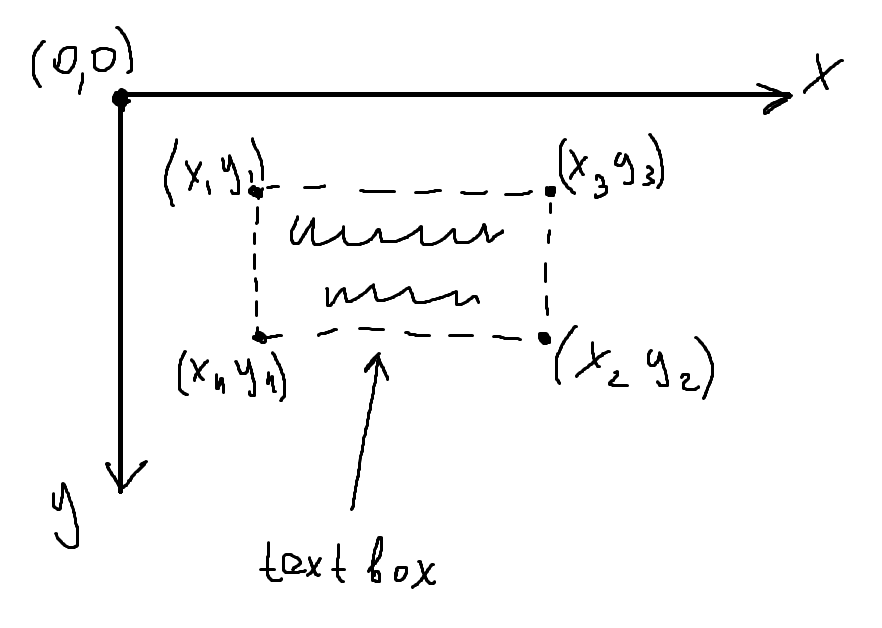